# Covid 19 Prediction Study - CBC

### Importing libraries

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Baskent Data

In [163]:
# başkent university data
veriler = pd.read_excel(r'covid data 05.xlsx')

In [165]:
# başkent uni data
print('total number of pcr results: ',len(veriler['pcr']))
print('number of positive pcr results: ',len(veriler[veriler['pcr']=='positive']))
print('number of negative pcr results: ',len(veriler[veriler['pcr']=='negative']))

total number of pcr results:  1391
number of positive pcr results:  707
number of negative pcr results:  684


## Sao Paulo dataset

In [166]:
veri_saopaulo = pd.read_excel(r'sao_dataset.xlsx' )

In [167]:

print('total number of pcr results: ',len(veri_saopaulo['SARS-Cov-2 exam result']))
print('number of positive pcr results: ',len(veri_saopaulo[veri_saopaulo['SARS-Cov-2 exam result']=='positive']))
print('number of negative pcr results: ',len(veri_saopaulo[veri_saopaulo['SARS-Cov-2 exam result']=='negative']))

total number of pcr results:  5644
number of positive pcr results:  558
number of negative pcr results:  5086


In [168]:
veri_saopaulo_l = list(veri_saopaulo.columns)
veri_saopaulo_l

['Patient ID',
 'Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasma pneumoniae',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Neutrophils',
 'Urea',

In [169]:
veri_saopaulo_l2 = ['Hematocrit', 'Hemoglobin', 'Platelets', 'Mean platelet volume ', 
'Red blood Cells', 'Lymphocytes', 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils',
 'Mean corpuscular volume (MCV)', 'Monocytes','Red blood cell distribution width (RDW)']

In [170]:
len(veri_saopaulo_l2)

14

In [171]:
veriler_sao_cbc = veri_saopaulo[['Hemoglobin','Hematocrit', 'Lymphocytes', 'Leukocytes'
             ,'Mean corpuscular hemoglobin (MCH)','Mean corpuscular hemoglobin concentration (MCHC)'
               ,'Mean corpuscular volume (MCV)','Monocytes','Neutrophils','Basophils','Eosinophils'
               ,'Red blood Cells','Red blood cell distribution width (RDW)','Platelets','SARS-Cov-2 exam result']]
veriler_sao_cbc = veriler_sao_cbc.dropna(axis=0)
veriler_sao_cbc.describe()

,Hemoglobin,Hematocrit,Lymphocytes,Leukocytes,Mean corpuscular hemoglobin (MCH),Mean corpuscular hemoglobin concentration (MCHC),Mean corpuscular volume (MCV),Monocytes,Neutrophils,Basophils,Eosinophils,Red blood Cells,Red blood cell distribution width (RDW),Platelets
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,5.130000e+02,513.000000,513.000000,513.000000,513.000000,513.000000
mean,0.086606,0.091376,0.022759,-0.144044,0.040312,0.004229,0.043321,0.108430,5.908361e-09,0.162077,0.076773,0.063135,-0.055365,-0.049149
std,0.956390,0.952531,0.919831,0.758391,0.960953,1.007307,0.953068,0.950017,1.000976e+00,0.822858,1.039130,0.983065,0.952228,0.934409
min,-3.844355,-4.066536,-1.830953,-1.928470,-5.937604,-5.431808,-5.101581,-2.163721,-3.339775e+00,-1.140144,-0.835508,-3.635631,-1.598094,-2.313752
25%,-0.460932,-0.473031,-0.679533,-0.656734,-0.449085,-0.552476,-0.474754,-0.482876,-6.518655e-01,-0.529226,-0.624811,-0.515058,-0.625073,-0.605346
50%,0.165628,0.122073,0.028378,-0.272709,0.125903,-0.054585,0.086074,-0.062665,-5.364196e-02,0.081693,-0.245556,0.066744,-0.182790,-0.140559
75%,0.729532,0.785841,0.599824,0.272718,0.596348,0.642463,0.626871,0.541389,6.838943e-01,0.692611,0.386534,0.701437,0.259492,0.437284
max,2.671868,2.662704,3.218241,2.949764,4.098546,3.331071,3.410980,4.533397,2.535929e+00,4.663579,8.350876,3.645706,6.982184,9.532034


In [172]:
# PCR result to integer (0: negative, 1: positive)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
veriler_sao_cbc["PCR_result"] = le.fit_transform(veriler_sao_cbc["SARS-Cov-2 exam result"])
veriler_sao_cbc.head()

,Hemoglobin,Hematocrit,Lymphocytes,Leukocytes,Mean corpuscular hemoglobin (MCH),Mean corpuscular hemoglobin concentration (MCHC),Mean corpuscular volume (MCV),Monocytes,Neutrophils,Basophils,Eosinophils,Red blood Cells,Red blood cell distribution width (RDW),Platelets,SARS-Cov-2 exam result,PCR_result
1,-0.022340,0.236515,0.318366,-0.094610,-0.292269,-0.950790,0.166192,0.357547,-0.619086,-0.223767,1.482158,0.102004,-0.625073,-0.517413,negative,0
8,-0.774212,-1.571682,-0.005738,0.364550,0.178175,3.331071,-1.336024,0.068652,-0.127395,-0.223767,1.018625,-0.850035,-0.978899,1.429667,negative,0
15,-0.586244,-0.747693,-1.114514,-0.884923,1.746323,0.542882,1.668409,1.276759,0.880570,0.081693,-0.666950,-1.361315,-1.067355,-0.429480,negative,0
18,0.792188,0.991838,0.045436,-0.211488,0.334989,-0.452899,0.606842,-0.220244,0.265957,-0.834685,-0.709090,0.542763,0.171035,0.072992,negative,0
22,-0.147652,0.190738,0.002791,-1.132592,-0.083183,-1.249524,0.566783,2.012129,-0.422410,0.387152,-0.709090,-0.127191,0.613318,-0.668155,negative,0


In [173]:
# Sao Paulo Data
print('total number of pcr results: ',len(veriler_sao_cbc['SARS-Cov-2 exam result']))
print('number of positive pcr results: ',len(veriler_sao_cbc[veriler_sao_cbc['SARS-Cov-2 exam result']=='positive']))
print('number of negative pcr results: ',len(veriler_sao_cbc[veriler_sao_cbc['SARS-Cov-2 exam result']=='negative']))

total number of pcr results:  513
number of positive pcr results:  75
number of negative pcr results:  438


In [174]:
# select random 75 rows to reach balanced data

saopaulo_negative = veriler_sao_cbc[veriler_sao_cbc['SARS-Cov-2 exam result']=='negative']
saopaulo_negative75 = saopaulo_negative.sample(n = 75)

In [175]:
saopaulo_negative75

,Hemoglobin,Hematocrit,Lymphocytes,Leukocytes,Mean corpuscular hemoglobin (MCH),Mean corpuscular hemoglobin concentration (MCHC),Mean corpuscular volume (MCV),Monocytes,Neutrophils,Basophils,Eosinophils,Red blood Cells,Red blood cell distribution width (RDW),Platelets,SARS-Cov-2 exam result,PCR_result
203,0.854844,1.174947,-0.193377,-0.317234,-0.083183,-0.851210,0.366488,0.042388,-0.053642,-0.223767,1.608576,0.824849,-0.448160,-1.019885,negative,0
403,0.102972,0.030518,-1.387443,1.046335,0.230447,0.343725,0.126132,0.278757,1.511574,-0.834685,-0.835508,-0.056669,-0.005877,-0.705840,negative,0
576,1.418748,1.518275,0.292779,-0.709607,-0.710443,-0.054585,-0.815256,-0.351560,-0.143785,0.692611,0.175837,1.794518,-0.359703,0.123239,negative,0
3992,0.290940,0.488289,-0.918346,0.322808,0.909977,-0.652057,1.367966,-0.482876,1.134611,-0.834685,0.007280,-0.232973,0.967144,0.374475,negative,0
5618,-2.779203,-3.242548,-1.830953,-1.733675,2.059952,1.538664,1.408024,1.381812,1.552548,-1.140144,-0.582671,-3.318285,-0.448160,-1.773594,negative,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,-0.210308,-0.221256,1.930355,0.086271,1.014521,0.044991,1.107581,-0.456613,-1.487740,-0.834685,-0.624811,-0.708992,-0.182790,0.512655,negative,0
3378,0.040316,0.236515,-1.029223,0.364550,0.491805,-0.652057,0.927315,0.777758,0.831401,-0.529226,0.049419,-0.250603,1.320970,-0.479728,negative,0
71,0.290940,0.671398,0.173372,-0.653951,-0.501356,-1.249524,0.086074,1.250496,-0.356851,0.081693,-0.624811,0.525133,-0.182790,0.135801,negative,0
22,-0.147652,0.190738,0.002791,-1.132592,-0.083183,-1.249524,0.566783,2.012129,-0.422410,0.387152,-0.709090,-0.127191,0.613318,-0.668155,negative,0


In [176]:
saopaulo_positive75 = veriler_sao_cbc[veriler_sao_cbc['SARS-Cov-2 exam result']=='positive']

In [177]:
saopaulo_positive75

,Hemoglobin,Hematocrit,Lymphocytes,Leukocytes,Mean corpuscular hemoglobin (MCH),Mean corpuscular hemoglobin concentration (MCHC),Mean corpuscular volume (MCV),Monocytes,Neutrophils,Basophils,Eosinophils,Red blood Cells,Red blood cell distribution width (RDW),Platelets,SARS-Cov-2 exam result,PCR_result
568,0.792188,0.991838,-0.048383,-0.420197,-1.442245,-0.452899,-1.396114,1.933339,-0.414215,1.303529,-0.498393,1.653476,0.967144,-0.341548,positive,1
884,-0.398276,-0.495919,-0.935404,-0.820919,0.334989,0.244149,0.226280,-0.456613,1.282118,-1.140144,-0.666950,-0.567950,-0.978899,-0.718402,positive,1
1108,-0.648900,-0.312811,-0.099557,-0.968407,0.021361,-1.448681,0.807138,1.513128,-0.315877,-0.529226,0.175837,-0.656101,0.347948,-0.027502,positive,1
1162,-0.272964,-0.518807,-0.457777,-0.573250,0.439533,0.941197,0.066045,2.537393,-0.127395,-0.223767,-0.709090,-0.515058,-0.801985,-0.215930,positive,1
1293,0.729532,0.694287,-0.636887,-0.606644,0.125903,0.343725,-0.014074,0.882811,0.446244,-0.223767,-0.119138,0.595655,-0.713529,-0.743526,positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,0.040316,-0.312811,1.589193,-1.285645,0.700891,1.339507,0.066045,-0.456613,-1.209115,-0.223767,-0.456253,-0.338755,0.347948,-0.592784,positive,1
5564,0.604220,1.152058,-0.679533,-0.662300,-0.658171,-1.647838,0.126132,0.488863,0.667504,0.081693,-0.456253,0.930631,-0.890442,-0.529975,positive,1
5566,1.042812,1.106281,-0.483364,0.155841,0.073631,0.044991,0.046015,-0.640455,0.913350,-0.529226,-0.793368,0.930631,0.171035,-0.253615,positive,1
5585,1.356092,1.197836,0.966573,-0.834833,1.589509,0.841616,1.307876,1.197969,-1.094387,-0.529226,-0.582671,0.384090,-0.094334,-1.911774,positive,1


In [178]:
#concatinating positive and negative datasets

saopaulo_last = [saopaulo_positive75,saopaulo_negative75]

saopaulo_lastdf = pd.concat(saopaulo_last)

In [179]:
saopaulo_lastdf

,Hemoglobin,Hematocrit,Lymphocytes,Leukocytes,Mean corpuscular hemoglobin (MCH),Mean corpuscular hemoglobin concentration (MCHC),Mean corpuscular volume (MCV),Monocytes,Neutrophils,Basophils,Eosinophils,Red blood Cells,Red blood cell distribution width (RDW),Platelets,SARS-Cov-2 exam result,PCR_result
568,0.792188,0.991838,-0.048383,-0.420197,-1.442245,-0.452899,-1.396114,1.933339,-0.414215,1.303529,-0.498393,1.653476,0.967144,-0.341548,positive,1
884,-0.398276,-0.495919,-0.935404,-0.820919,0.334989,0.244149,0.226280,-0.456613,1.282118,-1.140144,-0.666950,-0.567950,-0.978899,-0.718402,positive,1
1108,-0.648900,-0.312811,-0.099557,-0.968407,0.021361,-1.448681,0.807138,1.513128,-0.315877,-0.529226,0.175837,-0.656101,0.347948,-0.027502,positive,1
1162,-0.272964,-0.518807,-0.457777,-0.573250,0.439533,0.941197,0.066045,2.537393,-0.127395,-0.223767,-0.709090,-0.515058,-0.801985,-0.215930,positive,1
1293,0.729532,0.694287,-0.636887,-0.606644,0.125903,0.343725,-0.014074,0.882811,0.446244,-0.223767,-0.119138,0.595655,-0.713529,-0.743526,positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,-0.210308,-0.221256,1.930355,0.086271,1.014521,0.044991,1.107581,-0.456613,-1.487740,-0.834685,-0.624811,-0.708992,-0.182790,0.512655,negative,0
3378,0.040316,0.236515,-1.029223,0.364550,0.491805,-0.652057,0.927315,0.777758,0.831401,-0.529226,0.049419,-0.250603,1.320970,-0.479728,negative,0
71,0.290940,0.671398,0.173372,-0.653951,-0.501356,-1.249524,0.086074,1.250496,-0.356851,0.081693,-0.624811,0.525133,-0.182790,0.135801,negative,0
22,-0.147652,0.190738,0.002791,-1.132592,-0.083183,-1.249524,0.566783,2.012129,-0.422410,0.387152,-0.709090,-0.127191,0.613318,-0.668155,negative,0


In [180]:
Xs = saopaulo_lastdf[['Hemoglobin','Hematocrit', 'Lymphocytes', 'Leukocytes'
             ,'Mean corpuscular hemoglobin (MCH)','Mean corpuscular hemoglobin concentration (MCHC)'
               ,'Mean corpuscular volume (MCV)','Monocytes','Neutrophils','Basophils','Eosinophils'
               ,'Red blood Cells','Red blood cell distribution width (RDW)','Platelets']].values

Ys = saopaulo_lastdf['PCR_result'].values

### Baskent Data features (demographic data)

In [182]:
# Exporting demographical data to excel

veriler.describe().to_excel(r'/Users/hikmetcancubukcu/Desktop/covidai/veriler başkent covid/covid cbc demographic2.xlsx')

In [183]:
veriler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hastano                   1391 non-null   int64  
 1   yasiondalik               1391 non-null   float64
 2   cinsiyet                  1391 non-null   object 
 3   alanin_aminotransferaz    1391 non-null   int64  
 4   aspartat_aminotransferaz  1391 non-null   int64  
 5   basophils                 1391 non-null   float64
 6   c_reactive_protein        1391 non-null   float64
 7   eosinophils               1391 non-null   float64
 8   hb                        1391 non-null   float64
 9   hct                       1391 non-null   float64
 10  kreatinin                 1391 non-null   float64
 11  laktat_dehidrogenaz       1391 non-null   int64  
 12  lenfosit                  1391 non-null   float64
 13  lokosit                   1391 non-null   float64
 14  mch     

### Baskent Data preprocessing

In [ ]:
# Gender to integer (0 : E, 1 : K)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
veriler["gender"] = le.fit_transform(veriler["cinsiyet"])



In [ ]:
# Pcr to numeric values (negative : 0 , positive : 1)

veriler["pcr_result"] = le.fit_transform(veriler["pcr"])



In [186]:
veriler.info() # başkent uni data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   hastano                   1391 non-null   int64  
 1   yasiondalik               1391 non-null   float64
 2   cinsiyet                  1391 non-null   object 
 3   alanin_aminotransferaz    1391 non-null   int64  
 4   aspartat_aminotransferaz  1391 non-null   int64  
 5   basophils                 1391 non-null   float64
 6   c_reactive_protein        1391 non-null   float64
 7   eosinophils               1391 non-null   float64
 8   hb                        1391 non-null   float64
 9   hct                       1391 non-null   float64
 10  kreatinin                 1391 non-null   float64
 11  laktat_dehidrogenaz       1391 non-null   int64  
 12  lenfosit                  1391 non-null   float64
 13  lokosit                   1391 non-null   float64
 14  mch     

In [187]:
# Dependent & Independent variables (cbc)

X = veriler[['hb','hct','lenfosit','lokosit','mch','mchc','mcv','monocytes','notrofil',
             'basophils','eosinophils', 'rbc','rdw','trombosit']].values
Y = veriler['pcr_result'].values

In [188]:
# Train - Test Spilt (80% - 20%)

from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,test_size=0.20, random_state=0)


In [189]:
print('n of test set', len(y_test))
print('n of train set', len(y_train))

n of test set 279
n of train set 1112


In [190]:
# Standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [191]:
#confusion matrix function

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


### Logistic Regression

In [192]:
# importing library

from sklearn.linear_model import LogisticRegression

In [193]:
logr= LogisticRegression(random_state=0)

In [194]:
logr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [195]:
y_hat= logr.predict(X_test)
yhat_logr = logr.predict_proba(X_test)
y_hat22 = y_hat

Confusion matrix, without normalization
[[116  26]
 [ 30 107]]


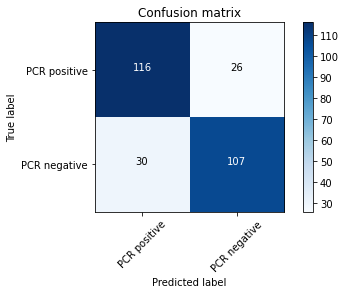

In [196]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_hat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PCR positive','PCR negative'],normalize= False,  title='Confusion matrix')

In [197]:
print (classification_report(y_test, y_hat))

print('precision : positive predictive value')
print('recall : sensitivity')

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       137
           1       0.79      0.82      0.81       142

    accuracy                           0.80       279
   macro avg       0.80      0.80      0.80       279
weighted avg       0.80      0.80      0.80       279

precision : positive predictive value
recall : sensitivity


In [198]:
# 10 fold cross validation

from sklearn.model_selection import cross_val_score
''' 
1. estimator : classifier (bizim durum)
2. X
3. Y
4. cv : kaç katlamalı

'''
basari = cross_val_score(estimator = logr, X=X_train, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.7967744530244529
0.020836508667640717


In [98]:
# sao paulo external validation - logistic regression

In [201]:
y_hats= logr.predict(Xs)

yhats_logr = logr.predict_proba(Xs)
y_hats22 = y_hats

Confusion matrix, without normalization
[[67  8]
 [31 44]]


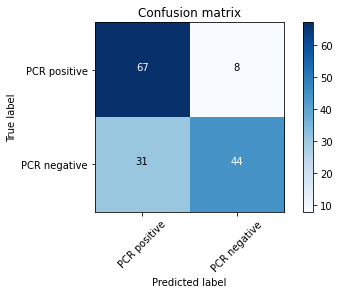

In [202]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Ys, y_hats22, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PCR positive','PCR negative'],normalize= False,  title='Confusion matrix')

In [203]:
print (classification_report(Ys, y_hats))

print('precision : positive predictive value')
print('recall : sensitivity')

              precision    recall  f1-score   support

           0       0.85      0.59      0.69        75
           1       0.68      0.89      0.77        75

    accuracy                           0.74       150
   macro avg       0.76      0.74      0.73       150
weighted avg       0.76      0.74      0.73       150

precision : positive predictive value
recall : sensitivity


### Support Vector Machines

In [207]:
from sklearn.svm import SVC
svc= SVC(kernel="rbf",probability=True)

In [208]:
svc.fit(X_train, y_train)
yhat= svc.predict(X_test)
yhat_svm = svc.predict_proba(X_test)
yhat4 = yhat # svm prediction => yhat4

Confusion matrix, without normalization
[[116  26]
 [ 26 111]]


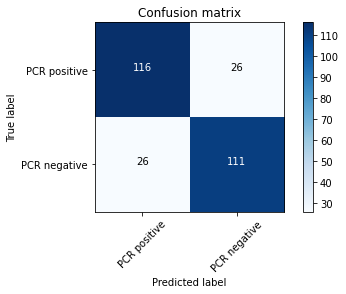

In [209]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat4, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PCR positive','PCR negative'],normalize= False,  title='Confusion matrix')

In [210]:
print (classification_report(y_test, yhat4))

print('precision : positive predictive value')
print('recall : sensitivity')

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       137
           1       0.82      0.82      0.82       142

    accuracy                           0.81       279
   macro avg       0.81      0.81      0.81       279
weighted avg       0.81      0.81      0.81       279

precision : positive predictive value
recall : sensitivity


In [211]:
# 10 fold cross validation

from sklearn.model_selection import cross_val_score
''' 
1. estimator : classifier (bizim durum)
2. X
3. Y
4. cv : kaç katlamalı

'''
basari = cross_val_score(estimator = svc, X=X_train, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.8084298584298585
0.029357583533502745


In [212]:
# SAO PAULO EXTERNAL VALIDATION

y_hats4= svc.predict(Xs)

yhats2_svc = svc.predict_proba(Xs)



Confusion matrix, without normalization
[[70  5]
 [25 50]]


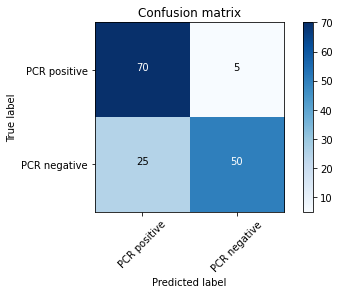

In [213]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Ys, y_hats4, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PCR positive','PCR negative'],normalize= False,  title='Confusion matrix')

In [214]:
print (classification_report(Ys, y_hats4))

print('precision : positive predictive value')
print('recall : sensitivity')

              precision    recall  f1-score   support

           0       0.91      0.67      0.77        75
           1       0.74      0.93      0.82        75

    accuracy                           0.80       150
   macro avg       0.82      0.80      0.80       150
weighted avg       0.82      0.80      0.80       150

precision : positive predictive value
recall : sensitivity


### RANDOM FOREST CLASSIFIER

In [216]:
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=200,criterion="entropy")

In [217]:
rfc.fit(X_train,y_train)
yhat7= rfc.predict(X_test)
yhat_rf = rfc.predict_proba(X_test)


Confusion matrix, without normalization
[[114  28]
 [ 20 117]]


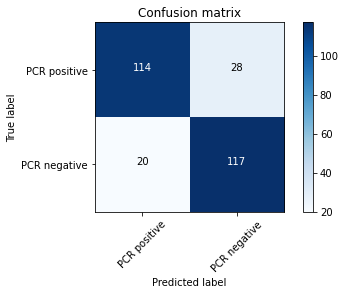

In [218]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat7, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PCR positive','PCR negative'],normalize= False,  title='Confusion matrix')

In [219]:
print (classification_report(y_test, yhat7))

print('precision : positive predictive value')
print('recall : sensitivity')

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       137
           1       0.85      0.80      0.83       142

    accuracy                           0.83       279
   macro avg       0.83      0.83      0.83       279
weighted avg       0.83      0.83      0.83       279

precision : positive predictive value
recall : sensitivity


In [220]:
# 10 fold cross validation

from sklearn.model_selection import cross_val_score
''' 
1. estimator : classifier (bizim durum)
2. X
3. Y
4. cv : kaç katlamalı

'''
basari = cross_val_score(estimator = rfc, X=X_train, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.827324646074646
0.03390914967191843


In [221]:
# SAO PAULO EXTERNAL VALIDATION

yhats7= rfc.predict(Xs)

yhats7_rfc = rfc.predict_proba(Xs)


Confusion matrix, without normalization
[[68  7]
 [24 51]]


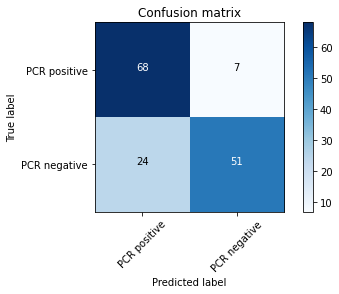

In [222]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Ys, yhats7, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PCR positive','PCR negative'],normalize= False,  title='Confusion matrix')

In [223]:
print (classification_report(Ys, yhats7))

print('precision : positive predictive value')
print('recall : sensitivity')

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        75
           1       0.74      0.91      0.81        75

    accuracy                           0.79       150
   macro avg       0.81      0.79      0.79       150
weighted avg       0.81      0.79      0.79       150

precision : positive predictive value
recall : sensitivity


### XGBOOST

In [226]:
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()

In [227]:
classifier.fit(X_train, y_train)
yhat8 = classifier.predict(X_test)
yhat_xgboost = classifier.predict_proba(X_test)


Confusion matrix, without normalization
[[109  33]
 [ 22 115]]


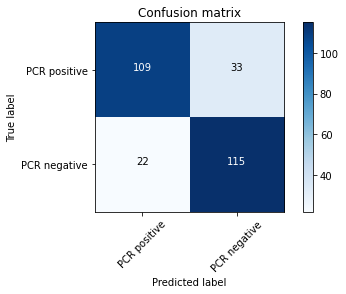

In [228]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat8, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PCR positive','PCR negative'],normalize= False,  title='Confusion matrix')

In [229]:
print (classification_report(y_test, yhat8))

print('precision : positive predictive value')
print('recall : sensitivity')

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       137
           1       0.83      0.77      0.80       142

    accuracy                           0.80       279
   macro avg       0.80      0.80      0.80       279
weighted avg       0.81      0.80      0.80       279

precision : positive predictive value
recall : sensitivity


In [230]:
# 10 fold cross validation

from sklearn.model_selection import cross_val_score
''' 
1. estimator : classifier (bizim durum)
2. X
3. Y
4. cv : kaç katlamalı

'''
basari = cross_val_score(estimator = rfc, X=X_train, y=y_train , cv = 10)
print(basari.mean())
print(basari.std())

0.8363014800514801
0.0310012414545756


In [231]:
# SAO PAULO EXTERNAL VALIDATION

y_hats8= classifier.predict(Xs)
y_hats_xgboost = classifier.predict_proba(Xs)


Confusion matrix, without normalization
[[64 11]
 [28 47]]


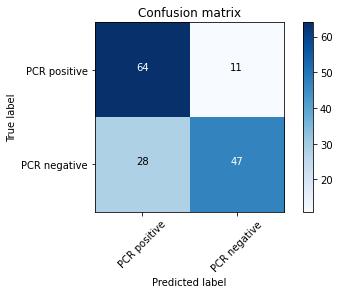

In [232]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(Ys, y_hats8, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PCR positive','PCR negative'],normalize= False,  title='Confusion matrix')

In [233]:
print (classification_report(Ys, y_hats8))

print('precision : positive predictive value')
print('recall : sensitivity')

              precision    recall  f1-score   support

           0       0.81      0.63      0.71        75
           1       0.70      0.85      0.77        75

    accuracy                           0.74       150
   macro avg       0.75      0.74      0.74       150
weighted avg       0.75      0.74      0.74       150

precision : positive predictive value
recall : sensitivity


## ROC & AUC

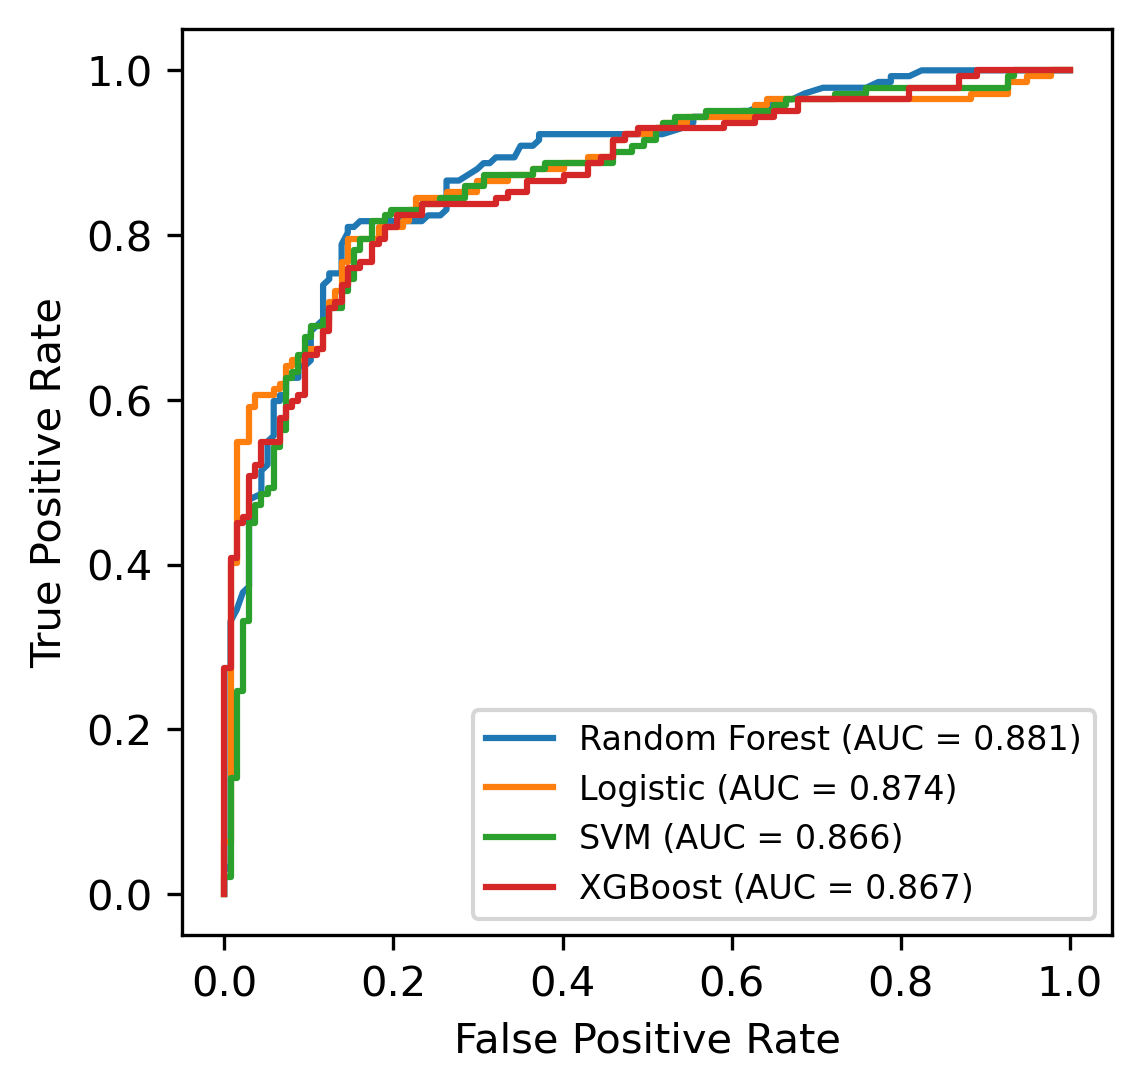

In [236]:
#baskent dataset

from sklearn.metrics import roc_curve, auc



logr_fpr, logr_tpr, threshold = roc_curve(y_test, yhat_logr[:,1]) # logr roc data
auc_logr = auc(logr_fpr, logr_tpr)



svm_fpr, svm_tpr, threshold = roc_curve(y_test, yhat_svm[:,1]) # svm roc data
auc_svm = auc(svm_fpr, svm_tpr)



rf_fpr, rf_tpr, threshold = roc_curve(y_test, yhat_rf[:,1]) # rf roc data
auc_rf = auc(rf_fpr, rf_tpr)

xgboost_fpr, xgboost_tpr, threshold = roc_curve(y_test, yhat_xgboost[:,1]) # xgboost roc data
auc_xgboost = auc(xgboost_fpr, xgboost_tpr)




plt.figure(figsize=(4, 4), dpi=300)


plt.plot(rf_fpr, rf_tpr,  linestyle='-', label='Random Forest (AUC = %0.3f)' % auc_rf)
plt.plot(logr_fpr, logr_tpr,  linestyle='-', label='Logistic (AUC = %0.3f)' % auc_logr)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (AUC = %0.3f)' % auc_svm)
plt.plot(xgboost_fpr, xgboost_tpr, linestyle='-', label='XGBoost (AUC = %0.3f)' % auc_xgboost)








plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(fontsize=8)

plt.show()



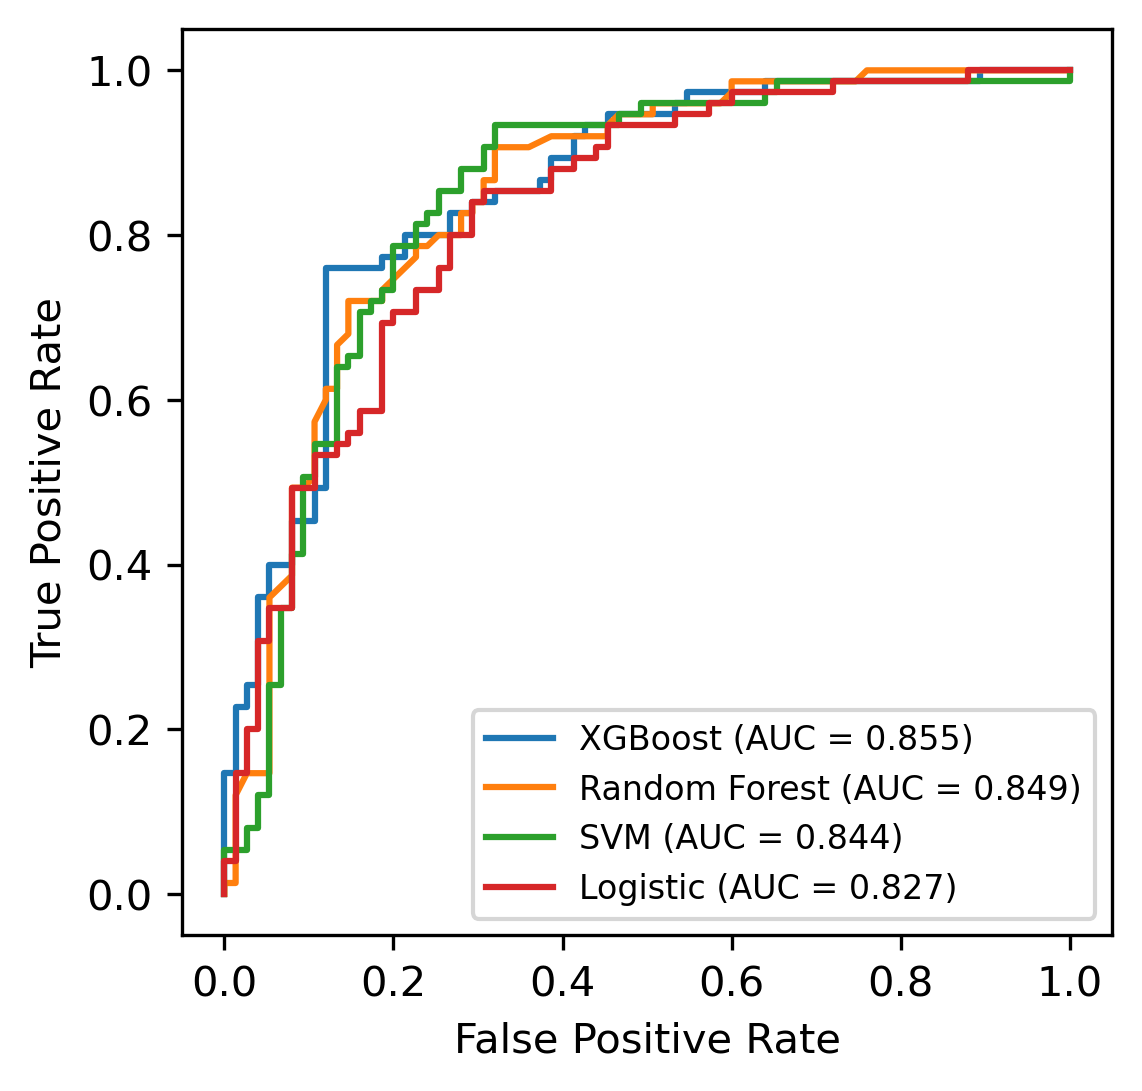

In [243]:
# sao paulo dataset

from sklearn.metrics import roc_curve, auc



logr_fpr, logr_tpr, threshold = roc_curve(Ys, yhats_logr[:,1]) # logr roc data
auc_logr = auc(logr_fpr, logr_tpr)



svm_fpr, svm_tpr, threshold = roc_curve(Ys, yhats2_svc[:,1]) # svm roc data
auc_svm = auc(svm_fpr, svm_tpr)



rf_fpr, rf_tpr, threshold = roc_curve(Ys, yhats7_rfc[:,1]) # rf roc data
auc_rf = auc(rf_fpr, rf_tpr)

xgboost_fpr, xgboost_tpr, threshold = roc_curve(Ys, y_hats_xgboost[:,1]) # xgboost roc data
auc_xgboost = auc(xgboost_fpr, xgboost_tpr)




plt.figure(figsize=(4, 4), dpi=300)

plt.plot(xgboost_fpr, xgboost_tpr, linestyle='-', label='XGBoost (AUC = %0.3f)' % auc_xgboost)
plt.plot(rf_fpr, rf_tpr,  linestyle='-', label='Random Forest (AUC = %0.3f)' % auc_rf)
plt.plot(svm_fpr, svm_tpr, linestyle='-', label='SVM (AUC = %0.3f)' % auc_svm)
plt.plot(logr_fpr, logr_tpr,  linestyle='-', label='Logistic (AUC = %0.3f)' % auc_logr)








plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend(fontsize=8)

plt.show()



In [238]:

yhat22= y_hat22*1
#yhat22 = [item for sublist in yhat22 for item in sublist]

yhat33= yhat4*1
yhat44= yhat7*1
yhat55= yhat8*1

roc_data_array = [yhat55,yhat22,yhat33,yhat44,y_test]

roc_data = pd.DataFrame(data=roc_data_array)

In [239]:
roc_data.transpose().to_excel(r'roc_covid_cbc_last.xlsx')

In [242]:
# validation data cbc


yhat222= y_hats22*1
#yhat22 = [item for sublist in yhat22 for item in sublist]

yhat333= y_hats4*1
yhat444= yhats7*1
yhat555= y_hats8*1

roc_data_array = [yhat555,yhat222,yhat333,yhat444,Ys]

roc_data = pd.DataFrame(data=roc_data_array)
roc_data.transpose().to_excel(r'roc_covid_cbc_last_val.xlsx')